In [ ]:
!pip install py2neo pandas matplotlib

In [1]:
from py2neo import Graph
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [24]:
graph = Graph("bolt://localhost/7687", auth=("neo4j", "1234567890"))

### Available Nodes

In [25]:
graph.run("CALL db.schema.visualization()").data()

[{'nodes': [Node('Continent', constraints=[], indexes=[], name='Continent'),
   Node('Airport', constraints=[], indexes=[], name='Airport'),
   Node('Country', constraints=[], indexes=[], name='Country')],
  'relationships': [HAS_ROUTE(Node(), Node()),
   IN_COUNTRY(Node(), Node()),
   ON_CONTINENT(Node(), Node()),
   ON_CONTINENT(Node(), Node())]}]

### Nodes for each of labels

In [26]:
result = {"label": [], "count": []}
for label in graph.run("CALL db.labels()").to_series():
    query = f"MATCH (:`{label}`) RETURN count(*) as count"
    count = graph.run(query).to_data_frame().iloc[0]['count']
    result["label"].append(label)
    result["count"].append(count)
nodes_df = pd.DataFrame(data=result)
nodes_df.sort_values("count")

,label,count
2,Continent,8
1,Country,22
0,Airport,30


### visualizing counts using matplotlib

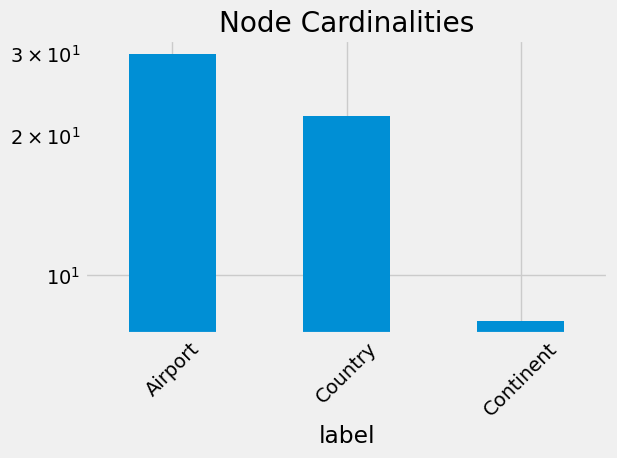

In [8]:
nodes_df.plot(kind='bar', x='label', y='count', legend=None, title="Node Cardinalities")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Types of relationships

In [10]:
result = {"relType": [], "count": []}
for relationship_type in graph.run("CALL db.relationshipTypes()").to_series():
    query = f"MATCH ()-[:`{relationship_type}`]->() RETURN count(*) as count"
    count = graph.run(query).to_data_frame().iloc[0]['count']
    result["relType"].append(relationship_type)
    result["count"].append(count)
rels_df = pd.DataFrame(data=result)
rels_df.sort_values("count")

,relType,count
1,IN_COUNTRY,60
2,ON_CONTINENT,104
0,HAS_ROUTE,480


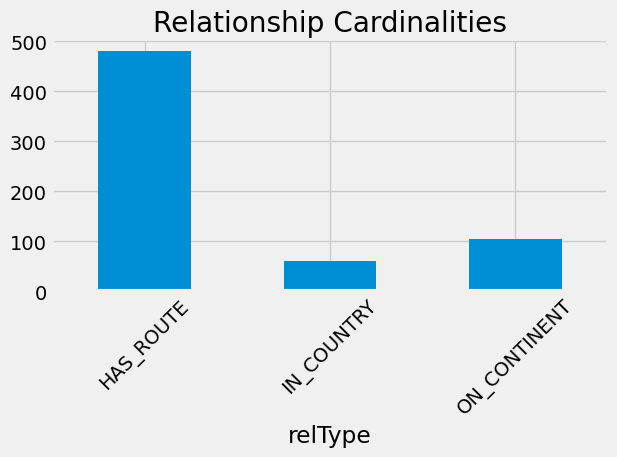

In [12]:
rels_df.plot(kind='bar', x='relType', y='count', legend=None, title="Relationship Cardinalities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
exploratory_query = """
MATCH (sourceAirport:Airport)-[:HAS_ROUTE]->(destinationAirport:Airport)
RETURN sourceAirport.name AS sourceAirport, destinationAirport.name AS destinationAirport
ORDER BY rand()
LIMIT 25

"""

graph.run(exploratory_query).to_data_frame()

,sourceAirport,destinationAirport
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
5,None,None
6,None,None
7,None,None
8,None,None
9,None,None


In [43]:
exploratory_query = """
MATCH p = shortestPath((start:Airport {desc: 'Los Angeles International Airport'})-[:HAS_ROUTE*]->(end:Airport {desc: "London City Airport"}))
RETURN [node in nodes(p) | node.desc] AS route, length(p) AS distance
ORDER BY distance ASC
LIMIT 1

"""

graph.run(exploratory_query)

route,distance
"['Los Angeles International Airport', 'Istanbul Airport', 'London City Airport']",2


In [42]:
query = """
MATCH (a:Airport)
RETURN COLLECT(a.desc) AS airportDescriptions
"""

result=graph.run(query)
print(result.data())

[{'airportDescriptions': ['Mumbai International Airport', 'John F. Kennedy International Airport', 'Chicago OHare International Airport', 'Harry Reid International Airport', 'Los Angeles International Airport', 'Lester B. Pearson International Airport', 'London City Airport', 'Adolfo Suárez Madrid–Barajas Airport', 'Paris-Charles de Gaulle Airport', 'Athens International Airport ', 'Leonardo da Vinci Fiumicino International Airport', 'Istanbul Airport', 'Changi Airport', 'Sydney Kingsford Smith Airport', 'Tullamarine Airport', 'Mumbai International Airport', 'John F. Kennedy International Airport', 'Chicago OHare International Airport', 'Harry Reid International Airport', 'Los Angeles International Airport', 'Lester B. Pearson International Airport', 'London City Airport', 'Adolfo Suárez Madrid–Barajas Airport', 'Paris-Charles de Gaulle Airport', 'Athens International Airport ', 'Leonardo da Vinci Fiumicino International Airport', 'Istanbul Airport', 'Changi Airport', 'Sydney Kingsford

In [34]:
query = """
MATCH (a:Airport)
RETURN a
"""

graph.run(query)

a
"(_0:Airport {PageRank: 1.4094754151468931, betweenness: 63.33001642208617, city: 'Mumbai', code: 'Mum', continent: 'Asia', country: 'India', degreeCentrality: 49.0, desc: 'Mumbai International Airport', elev: 1100, icao: 'BOM', id: '1', longest: 3448, region: 'india', runways: 2})"
"(_1:Airport {PageRank: 1.0364766780987325, betweenness: 21.87696775815926, city: 'New York', code: 'NYK', continent: 'North America', country: 'United States of America', degreeCentrality: 35.0, desc: 'John F. Kennedy International Airport', elev: 2000, icao: 'KJFK', id: '2', longest: 14511, region: 'USA', runways: 4})"
"(_2:Airport {PageRank: 1.4551010332740304, betweenness: 38.1410510134008, city: 'Chicago', code: 'ORD', continent: 'North America', country: 'United States of America', degreeCentrality: 52.0, desc: 'Chicago OHare International Airport', elev: 1126, icao: 'KORD', id: '3', longest: 3436, region: 'USA', runways: 8})"


In [37]:
query = """
    MATCH (a:Airport)
    RETURN a.name as name, a.city as city, a.country as country

"""

graph.run(query)

name,city,country
null,Mumbai,India
null,New York,United States of America
null,Chicago,United States of America
